![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

## Catalog of Risk Management Techniques in Trading

### Table of Contents
- [Position Sizing and Leverage Control](#position-sizing-and-leverage-control)
- [Trade-Level Risk Controls](#trade-level-risk-controls)
- [Portfolio-Level Risk Controls and Diversification](#portfolio-level-risk-controls-and-diversification)
- [Adaptive Risk Management Strategies](#adaptive-risk-management-strategies)
- [Automated Monitoring and Risk Systems](#automated-monitoring-and-risk-systems)
- [References](#references)

This notebook catalogs practical risk management techniques to guide implementation in research and live trading systems.


### Position Sizing and Leverage Control

- **Fixed fractional / percentage sizing**: Risk a set fraction of equity per trade (e.g., 1–2%). Keeps losses bounded and scales with account size.
  - **Use case**: Discipline for equities, FX, futures.
- **Volatility-based sizing (e.g., ATR)**: Scale position sizes so dollar risk is consistent across volatility regimes.
  - **Use case**: FX, crypto where volatility shifts are common.
- **Kelly criterion (Optimal f)**: Bet fraction based on estimated edge (win probability and payoff). Often use fractional Kelly to reduce estimation risk.
  - **Use case**: Strategies with measurable edge; conservative fraction advised to limit drawdowns.
- **Position limits & max leverage**: Cap exposure per position and total leverage (e.g., ≤10% of portfolio per position, ≤5:1 leverage).
  - **Use case**: Critical in futures/crypto to avoid overexposure.


### Trade-Level Risk Controls

- **Stop-loss orders (fixed and trailing)**: Predetermine exits to cap losses; trailing stops follow favorable price moves.
  - **Use case**: Universal; trailing popular in trend-following.
- **ATR/volatility-based stops**: Set stops as multiples of recent volatility (e.g., 2–3× ATR) to avoid noise-driven exits.
  - **Use case**: Crypto/commodities where volatility varies widely.
- **Take-profit orders**: Lock in gains at targets; can stagger partial exits to de-risk while letting winners run.
  - **Use case**: Trend and breakout systems with staged scaling out.
- **Trade frequency and timeout limits**: Throttle order rate; auto-close stale positions.
  - **Use case**: HFT/algo controls to prevent runaway execution issues.


### Portfolio-Level Risk Controls and Diversification

- **Diversification (assets & strategies)**: Combine low-correlation exposures to lower portfolio volatility.
  - **Use case**: Multi-asset, multi-strategy funds; crypto baskets (BTC/ETH/DeFi).
- **Correlation-aware limits**: Monitor pairwise/group correlations; cap aggregate exposure to highly correlated bets.
  - **Use case**: Equity/credit/crypto portfolios to avoid hidden concentration.
- **Concentration/sector caps**: Bound per-asset/sector/strategy weights (e.g., ≤5% single name, ≤20% sector).
  - **Use case**: Standard mandate control against idiosyncratic shocks.
- **Value-at-Risk (VaR)**: Limit potential loss under normal conditions (e.g., 95% 1-day VaR). Note: blind to tails.
  - **Use case**: Bank/hedge-fund universal metric across asset classes.
- **Conditional VaR (CVaR/Expected Shortfall)**: Average loss beyond VaR threshold; captures tail risk better; favored by regulators.
  - **Use case**: Volatile portfolios (options/crypto) for stricter buffers.
- **Maximum drawdown limits**: Enforce hard limits (e.g., 10–20%) triggering de-risking or halt.
  - **Use case**: Investor mandates; survival control in algotrading.
- **Portfolio-level stop / kill switch**: Auto-flat and halt when breach events occur (e.g., daily loss > X%).
  - **Use case**: HFT/crypto to contain rogue algos/flash crashes.
- **Stress testing & scenario analysis**: Revalue under historical/extreme scenarios; Monte Carlo for pathwise distribution.
  - **Use case**: Find regime vulnerabilities; set hedges/limits accordingly.


### Adaptive Risk Management Strategies

- **Dynamic volatility targeting**: Adjust leverage to maintain target portfolio volatility.
  - **Use case**: Risk-parity and quant futures portfolios.
- **Regime-switching exposure adjustment**: Alter sizing/stops by market regime (volatility/trend/liquidity).
  - **Use case**: Switch off mean-reversion in trends; allocate across sub-strategies by regime.
- **Hedging & tail risk**: Protective puts, VIX futures, inverse assets; small tail-hedge sleeves for crash insurance.
  - **Use case**: Limit drawdowns; especially for equity/crypto crash risk.
- **Risk parity & risk budgeting**: Equalize risk contributions; assign budgets (vol/ VaR) per sleeve and size accordingly.
  - **Use case**: Bridgewater-style All Weather; leverage safer assets to parity.
- **CPPI (Constant Proportion Portfolio Insurance)**: Allocate multiple of cushion to risky asset to protect floor.
  - **Use case**: Structured products/capital protection.
- **TIPP (Time-Invariant Portfolio Protection)**: Ratcheting floor tied to portfolio peak (trailing stop at portfolio level).
  - **Use case**: Long-term investors aiming to lock in gains.
- **Drawdown-based rule adjustments**: Anti-martingale de-risking after losses to recover with lower risk.
  - **Use case**: Reduce risk post drawdown; avoid averaging down.


### Automated Monitoring and Risk Systems

- **Real-time risk dashboards**: Track P&L, exposure, leverage, VaR, Greeks; alert on threshold breaches.
  - **Use case**: Essential for 24/7 crypto/algo desks.
- **Automated alerts & circuit breakers**: Pre-programmed triggers to pause trading, cut positions, or disable algos.
  - **Use case**: Rapid response in fast markets (index futures, crypto).
- **ML for risk anomaly detection**: Flag unusual behavior vs learned baselines; forecast volatility/regime shifts.
  - **Use case**: Complement classic risk with AI early warnings.
- **Pre-trade checks & throttles**: Reject orders violating limits/margin; rate-limit order flow.
  - **Use case**: Prevent fat-finger and runaway algos.
- **Operational/model risk controls**: Backtests, stress tests, version control, sandbox deploys, redundancy, execution anomaly halts.
  - **Use case**: Avoid tech/model failures becoming financial losses.


### References

- LuxAlgo – Risk Management Strategies for Algo Trading: `https://www.luxalgo.com/blog/risk-management-strategies-for-algo-trading/`
- Nurp – 7 Risk Management Strategies for Algorithmic Trading: `https://nurp.com/wisdom/7-risk-management-strategies-for-algorithmic-trading/`
- QuantInsti – Position Sizing in Trading: `https://blog.quantinsti.com/position-sizing/`
- Corporate Finance Institute – Value at Risk (VaR): `https://corporatefinanceinstitute.com/resources/career-map/sell-side/risk-management/value-at-risk-var/`
- QuantInsti – CVaR (Expected Shortfall): `https://blog.quantinsti.com/cvar-expected-shortfall/`
- Investopedia – Risks of Algorithmic High-Frequency Trading: `https://www.investopedia.com/articles/markets/012716/four-big-risks-algorithmic-highfrequency-trading.asp`
- Investopedia – Monte Carlo Simulation Basics: `https://www.investopedia.com/articles/investing/112514/monte-carlo-simulation-basics.asp`
- Medium – Regime-Switching Models in Quant Finance: `https://medium.com/@deepml1818/python-for-regime-switching-models-in-quantitative-finance-c54d2710f71b`
- Wikipedia – Risk parity: `https://en.wikipedia.org/wiki/Risk_parity`


<Axes: >

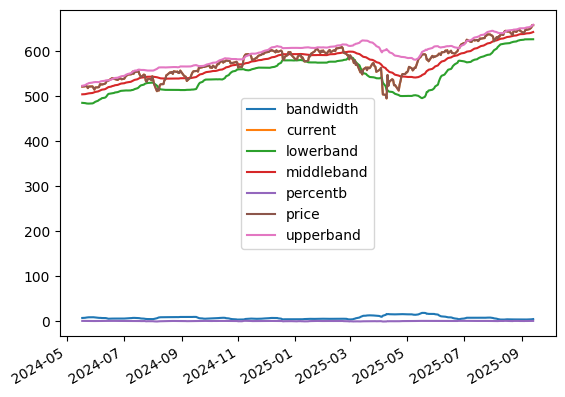

In [8]:

# QuantBook Analysis Tool
# For more information see [https://www.quantconnect.com/docs/v2/our-platform/research/getting-started]
qb = QuantBook()
spy = qb.add_equity("SPY")
history = qb.history(qb.securities.keys(), 360, Resolution.DAILY)

# Indicator Analysis
bbdf = qb.indicator(BollingerBands(30, 2), spy.symbol, 360, Resolution.DAILY)
bbdf.drop('standarddeviation', axis=1).plot()

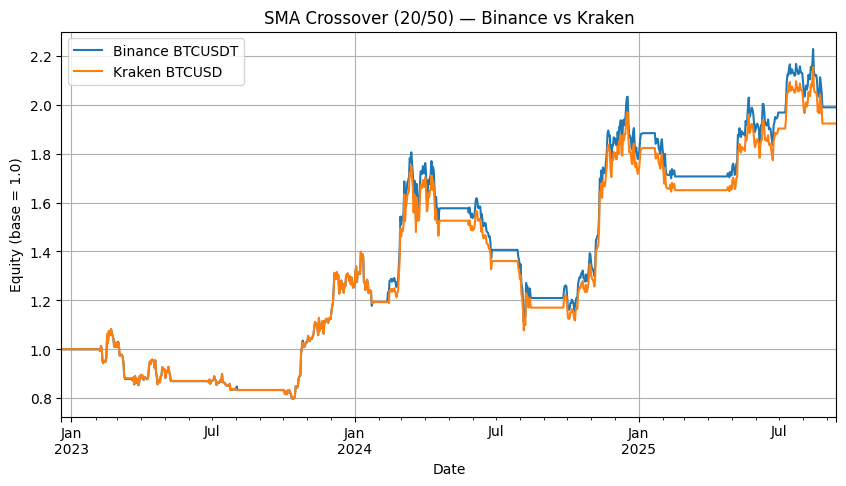

SMA parameters: 20 50

Binance:
  Total Return:   98.96%
  Ann. Return:    28.54%
  Ann. Vol:       35.90%
  Sharpe (rf=0):  0.80
  Max Drawdown:   -38.32%

Kraken:
  Total Return:   92.34%
  Ann. Return:    26.96%
  Ann. Vol:       35.96%
  Sharpe (rf=0):  0.75
  Max Drawdown:   -38.36%


In [9]:
# BTC SMA Crossover Comparison: Kraken vs Binance (identical logic)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# QuantConnect Research imports
from QuantConnect import Market, Resolution
from QuantConnect.Research import QuantBook

try:
    qb  # type: ignore[name-defined]
except NameError:
    qb = QuantBook()

# Add BTC symbols on two exchanges
binance = qb.add_crypto("BTCUSDT")  # Binance by default
kraken = qb.add_crypto("BTCUSD")    # Kraken symbol

# Get daily history and align
lookback_days = 1000
hist = qb.history([binance.symbol, kraken.symbol], lookback_days, Resolution.DAILY)
if hist is None or len(hist) == 0:
    raise ValueError("No history returned. Try a smaller lookback or different resolution.")

# Close prices pivoted by symbol
closes = hist['close'].unstack(level=0).rename(columns={
    binance.symbol: 'Binance_BTCUSDT',
    kraken.symbol: 'Kraken_BTCUSD'
}).dropna()

# Identical SMA crossover parameters
fast_window = 20
slow_window = 50

# Helper to run long-only SMA crossover
def run_sma_crossover(price: pd.Series, fast: int, slow: int, periods_per_year: int = 365):
    fast_sma = price.rolling(fast).mean()
    slow_sma = price.rolling(slow).mean()
    position = (fast_sma > slow_sma).astype(int)  # 1 long, 0 flat
    rets = price.pct_change().fillna(0.0)
    strat_rets = (position.shift(1).fillna(0.0) * rets)
    equity = (1.0 + strat_rets).cumprod()

    # Stats
    total_return = equity.iloc[-1] - 1.0
    n = strat_rets.shape[0]
    ann_return = (1.0 + strat_rets).prod() ** (periods_per_year / max(n, 1)) - 1.0
    ann_vol = strat_rets.std(ddof=0) * np.sqrt(periods_per_year)
    sharpe = ann_return / ann_vol if ann_vol > 0 else np.nan
    roll_max = equity.cummax()
    drawdown = equity / roll_max - 1.0
    max_dd = drawdown.min()

    return {
        'equity': equity,
        'position': position,
        'stats': {
            'total_return': float(total_return),
            'ann_return': float(ann_return),
            'ann_vol': float(ann_vol),
            'sharpe': float(sharpe),
            'max_drawdown': float(max_dd)
        }
    }

res_binance = run_sma_crossover(closes['Binance_BTCUSDT'], fast_window, slow_window)
res_kraken = run_sma_crossover(closes['Kraken_BTCUSD'], fast_window, slow_window)

# Plot equity curves
plt.figure(figsize=(10, 5))
res_binance['equity'].plot(label='Binance BTCUSDT')
res_kraken['equity'].plot(label='Kraken BTCUSD')
plt.title(f'SMA Crossover ({fast_window}/{slow_window}) — Binance vs Kraken')
plt.ylabel('Equity (base = 1.0)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Print summary stats
print('SMA parameters:', fast_window, slow_window)
for name, res in [('Binance', res_binance), ('Kraken', res_kraken)]:
    s = res['stats']
    print(f"\n{name}:")
    print(f"  Total Return:   {s['total_return']:.2%}")
    print(f"  Ann. Return:    {s['ann_return']:.2%}")
    print(f"  Ann. Vol:       {s['ann_vol']:.2%}")
    print(f"  Sharpe (rf=0):  {s['sharpe']:.2f}")
    print(f"  Max Drawdown:   {s['max_drawdown']:.2%}")
